# Exercise Sheet 1: Neurons

In [1]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the more discrete tranfer function equivalent in form of a function of the sign of the input. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function.

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

In [2]:
def logistic(h,a=1):
    return 1/(1+np.exp(-a*h))

signtrafunc=lambda x: (np.sign(x)+1)/2

def dlogistic(h,a=1):
    return logistic(x,a)-np.power(logistic(x,a),2)

## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,x)" and "neuron.dtrafunc(self,h)" for the transfer function and the method "neuron.out(self,h)" to calculate the output for input *x* and *h*, respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *x*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

In [3]:
class neuron:
    def __init__(self,w,b,trafunc=logistic,dtrafunc=dlogistic):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
    
    def out(self, x):
        return self.trafunc(np.dot(self.w,x)-self.b)
            

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task and then apply the same weights w and bias b on a neuron with the logistic transfer function.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

In [4]:
## OR function
w=np.array([1 ,1])
b=0.5

neuron1=neuron(w,b,signtrafunc)

print('Ouput of the OR function with sign-based function for different inputs:')
print('[0,0]-->'+str(neuron1.out([0,0])))
print('[1,0]-->'+str(neuron1.out([1,0])))
print('[0,1]-->'+str(neuron1.out([0,1])))
print('[1,1]-->'+str(neuron1.out([1,1])))

## OR function
w=np.array([1 ,1])
b=0.5

neuron1=neuron(w,b)

print('Ouput of the OR function with logistic transfer function for different inputs:')
print('[0,0]-->'+str(neuron1.out([0,0])))
print('[1,0]-->'+str(neuron1.out([1,0])))
print('[0,1]-->'+str(neuron1.out([0,1])))
print('[1,1]-->'+str(neuron1.out([1,1])))

## AND function
w=np.array([1 ,1])
b=1.5
#x=np.array([1 ,-0.5]);
neuron2=neuron(w,b,signtrafunc)

print('Ouput of the AND function with sign-based function for different inputs:')
print('[0,0]-->'+str(neuron2.out([0,0])))
print('[1,0]-->'+str(neuron2.out([1,0])))
print('[0,1]-->'+str(neuron2.out([0,1])))
print('[1,1]-->'+str(neuron2.out([1,1])))

## AND function
w=np.array([1 ,1])
b=1.5
#x=np.array([1 ,-0.5]);
neuron2=neuron(w,b)

print('Ouput of the AND function with logistic transfer function for different inputs:')
print('[0,0]-->'+str(neuron2.out([0,0])))
print('[1,0]-->'+str(neuron2.out([1,0])))
print('[0,1]-->'+str(neuron2.out([0,1])))
print('[1,1]-->'+str(neuron2.out([1,1])))



Ouput of the OR function with sign-based function for different inputs:
[0,0]-->0.0
[1,0]-->1.0
[0,1]-->1.0
[1,1]-->1.0
Ouput of the OR function with logistic transfer function for different inputs:
[0,0]-->0.377540668798
[1,0]-->0.622459331202
[0,1]-->0.622459331202
[1,1]-->0.817574476194
Ouput of the AND function with sign-based function for different inputs:
[0,0]-->0.0
[1,0]-->0.0
[0,1]-->0.0
[1,1]-->1.0
Ouput of the AND function with logistic transfer function for different inputs:
[0,0]-->0.182425523806
[1,0]-->0.377540668798
[0,1]-->0.377540668798
[1,1]-->0.622459331202


## Task 4: The XOR function (100 extra points - thinking and maybe programming)
Build an XOR function with a single neuron of the class you have created and no further tools.

In [5]:
print('The XOR is not a linear seperable problem and thus a single perceptron can not approximate this function!')

The XOR is not a linear seperable problem and thus a single perceptron can not approximate this function!


## Task 5: The current density (4 points - analytic derivation)
Analytically derive the current density $\vec{J}=-\sigma\nabla\phi$ of a dipole field at origin step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. 

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

$\sigma$ is the specific conductivity of the material (a constant).

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{J}=-\sigma \nabla \phi=- \sigma \nabla  \left(\frac{1}{4\pi \epsilon_0} \frac{\vec{p} \cdot \vec{r}}{\left|r\right|^3}\right)=- \sigma \nabla  \left(\frac{1}{4\pi \epsilon_0} \frac{p_x\cdot x+p_y\cdot y+p_z\cdot z}{\left(r^2_x+r^2_y+r^2_z\right)^\frac{3}{2}} \right)=- \frac{\sigma}{4\pi \epsilon_0}  \left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)  \left(\frac{p_x\cdot x+p_y\cdot y+p_z\cdot z}{\left(r^2_x+r^2_y+r^2_z\right)^\frac{3}{2}} \right)$

$\frac{\delta}{\delta x} \left(\frac{\vec{p} \cdot \vec{r}}{\left|r\right|^3} \right)= \frac{\delta}{\delta x} \left(\frac{p_x\cdot x+p_y\cdot y+p_z\cdot z}{\left(x^2+y^2+z^2\right)^\frac{3}{2}} \right) = \frac{p_x \left|r\right|^3-\vec{p} \cdot \vec{r} 3 x\left(x^2+y^2+z^2\right)^\frac{1}{2}}{\left|r\right|^6}=\frac{p_x}{\left|r\right|^3} -3 \frac{\vec{p} \cdot \vec{r} x \left|r\right|}{\left|r\right|^6}=\frac{p_x}{\left|r\right|^3} -3 \frac{\vec{p} \cdot \vec{r} \cdot  x }{\left|r\right|^5}$

Equivalently for $\frac{\delta}{\delta y}$ and $\frac{\delta}{\delta z}$...

This leads to:

$\vec{J}=- \frac{\sigma}{4\pi \epsilon_0}  \left(
\begin{array}{c}
	\frac{p_x}{\left|r\right|^3} -3 \frac{\vec{p} \cdot \vec{r} \cdot  x }{\left|r\right|^5}\\
	\frac{p_y}{\left|r\right|^3} -3 \frac{\vec{p} \cdot \vec{r} \cdot  y }{\left|r\right|^5}\\
	\frac{p_z}{\left|r\right|^3} -3 \frac{\vec{p} \cdot \vec{r} \cdot  z }{\left|r\right|^5}
\end{array}
\right) 
= \frac{\sigma}{4\pi \epsilon_0}  \left( 3\frac{\vec{p}\cdot \vec{r}}{\left|r\right|^5}\cdot\vec{r}-\frac{\vec{p}}{\left|r\right|^3}\right)$

## Task 6: Electrical Field strength & potential of a dipole (5 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_0)$ and another one for the field strength $\vec{E}$ of a dipole in infinite charge free space at point $\vec{r}_0$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_0$ and the dipole moment $\vec{p}$ as inputs and return the scalar potential. $\vec{r}_0$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\left(\vec{r}-\vec{r}_0\right)}{\left|\vec{r}-\vec{r}_0\right|^3}$

$\vec{E}=\frac{1}{4 \pi \epsilon_0 } \left(3 \frac{\left(\vec{r}-\vec{r}_0\right) \cdot \vec{p}}{\left|\vec{r}-\vec{r}_0\right|^5} \cdot \left(\vec{r}-\vec{r}_0\right)-\frac{\vec{p}}{\left|\vec{r}-\vec{r}_0\right|^3}\right)$

Make a plot of the two variables in two dimensions from -10 to 10 for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{p}=[1,0]$.
Plot the potential as decibel values using the matlpotlib function plt.contour/contourf and the field strength using the function plt.streamplot. Draw both plots into the same figure (plt.hold('on')). The arguments to the plot function call for $\vec{E}$- and $\phi$- values need to have the shape corresponding to the XX and YY variables from np.meshgrid (see below).

*Hint: You can find $\epsilon_0$ in the scipy constants. Numpy's tensordot might simplify the treatment of multiple positions at once.*


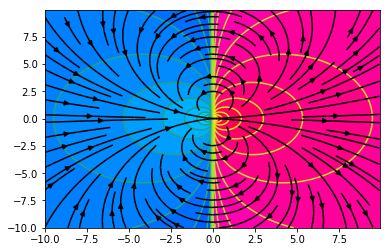

In [7]:
def phi_dip(r, p, r_0=None):
    r=np.array(r)
    p=np.array(p)    
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T
    return 1/(4*np.pi*constants.epsilon_0)*(np.tensordot(p,r,1))/np.power(np.linalg.norm(r,axis=0),3)

def E_dip(r, p, r_0=None):
    r=np.array(r)
    p=np.array(p)
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T   
    nom=((3*np.tensordot(p,r,1)*r/np.power(np.linalg.norm(r,axis=0),2)).T-p).T
    return (1/(4*np.pi*constants.epsilon_0)*nom/np.power(np.linalg.norm(r,axis=0),3))

x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
r_0=[0,0]

XX,YY=np.meshgrid(x,y)
p=np.array([1,0])

#Calculate the field and potential on the whole meshgrid 
phi=phi_dip([XX,YY],p,r_0)

E=E_dip([XX,YY],p,r_0)

#Plot the results: the sign in the potential is not neccessary, just for seeing the difference
potplot=plt.contour(x,y,20*np.log10(np.abs(phi))*np.sign(phi),100)
potplot=plt.contourf(x,y,20*np.log10(np.abs(phi))*np.sign(phi),100,cmap=plt.cm.hsv)
fieldplot=plt.streamplot(x,y,E[0,:,:],E[1,:,:],color='k')
plt.show()

In [18]:
import time
now=time.time()
phi=phi_dip([XX,YY],p,r_0)
print("execution time tensordot="+str(time.time()-now)+"s")
now=time.time()
for xx in x:
    for yy in y:
        phi_dip([x,y],p,r_0)
print("execution time for loops="+str(time.time()-now)+"s")

execution time tensordot=0.010001182556152344s
execution time for loops=2.2901649475097656s
